In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/house-price/1553768847-housing.csv


In [2]:
# Import Necessary Libraries
# import tensorflow_decision_forests as tfdf
# import os
# import tensorflow as tf
# import math

In [3]:
# Load the Data
data_path  = '/kaggle/input/house-price/1553768847-housing.csv'
data = pd.read_csv(data_path)

# Print out the First 5 Data Points
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# Create a copy of data set 
df = data.copy()
# Quick look at information
print('Info: ',df.info())

# Print Empty Line
print()

# Shape of Data
print('Shape: ',df.shape)

# Print Empty Line
print()

# Size of Data
print('Size: ', df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
Info:  None

Shape:  (20640, 10)

Size:  206400


In [5]:
# Finds Amount of Null Values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
# Repopulate Null Values with Mean
df["total_bedrooms"] = df["total_bedrooms"].fillna(df['total_bedrooms'].mean())

In [7]:
# Check to Make Sure Populated
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
# Evaluate Ocean Proximity Object
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
# Convert Ocean Proximity to Numbers
ocean_proximity_mapping = {
    'NEAR BAY': 1,
    '<1H OCEAN': 2,
    'INLAND': 3,
    'NEAR OCEAN': 4,
    'ISLAND': 5
}

# Implement in data 
df['ocean_proximity'] = df['ocean_proximity'].map(ocean_proximity_mapping)

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,1,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,1,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,1,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,1,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,1,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,3,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,3,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,3,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,3,84700


<Axes: xlabel='housing_median_age', ylabel='Count'>

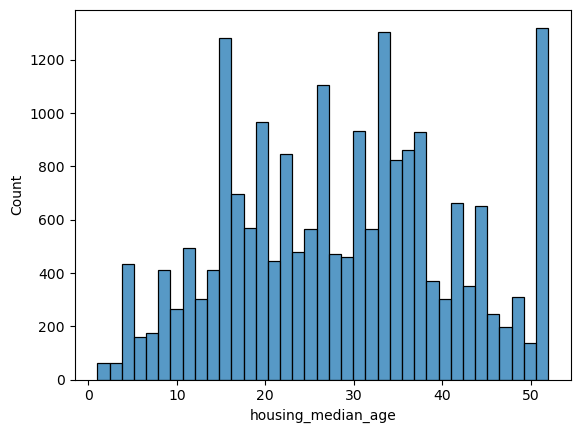

In [11]:
# Plot Histograms to Analyze Data
sns.histplot(x=df['housing_median_age'])

(array([  62.,   62.,  191.,  244.,  160.,  175.,  206.,  205.,  264.,
         254.,  238.,  302.,  412.,  512.,  771.,  698.,  570.,  502.,
         465.,  446.,  399.,  448.,  478.,  566.,  619.,  488.,  471.,
         461.,  476.,  458.,  565.,  615.,  689.,  824.,  862.,  537.,
         394.,  369.,  304.,  296.,  368.,  353.,  356.,  294.,  245.,
         198.,  177.,  134.,  136., 1321.]),
 array([ 1.  ,  2.02,  3.04,  4.06,  5.08,  6.1 ,  7.12,  8.14,  9.16,
        10.18, 11.2 , 12.22, 13.24, 14.26, 15.28, 16.3 , 17.32, 18.34,
        19.36, 20.38, 21.4 , 22.42, 23.44, 24.46, 25.48, 26.5 , 27.52,
        28.54, 29.56, 30.58, 31.6 , 32.62, 33.64, 34.66, 35.68, 36.7 ,
        37.72, 38.74, 39.76, 40.78, 41.8 , 42.82, 43.84, 44.86, 45.88,
        46.9 , 47.92, 48.94, 49.96, 50.98, 52.  ]),
 <BarContainer object of 50 artists>)

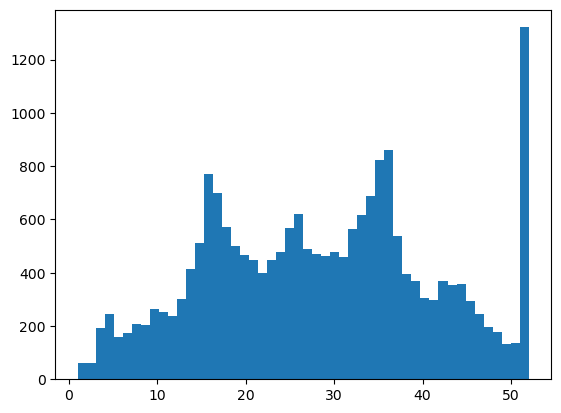

In [12]:
plt.hist(df['housing_median_age'], bins=50)

In [13]:
# Copy and Filter Column Names
columns = df.columns.to_list()
columns.remove('longitude')
columns.remove('latitude')
columns.remove('ocean_proximity')
columns.remove('median_house_value')
print(columns)

['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


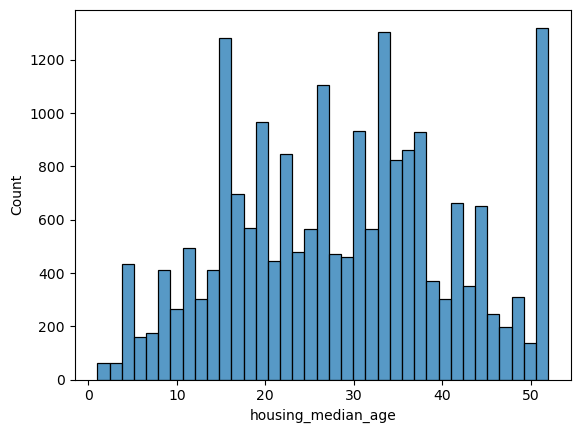

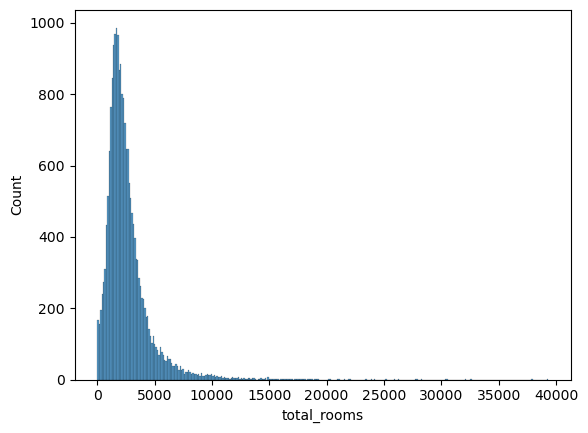

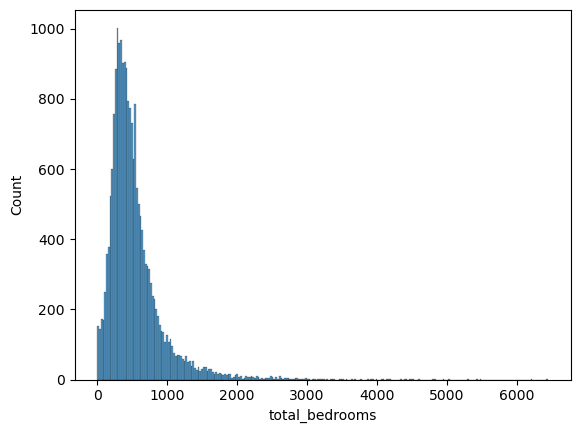

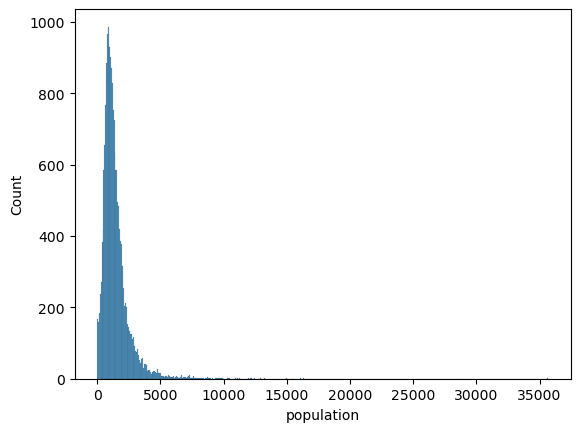

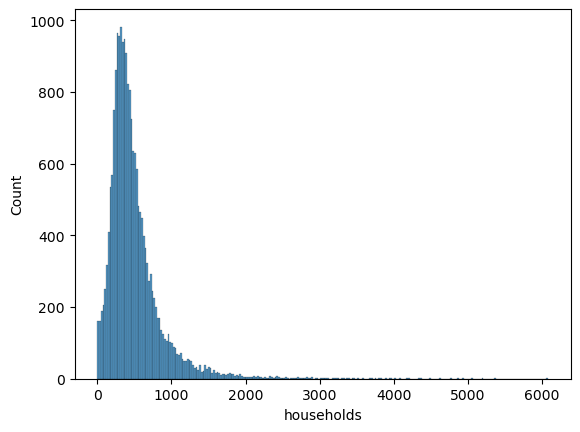

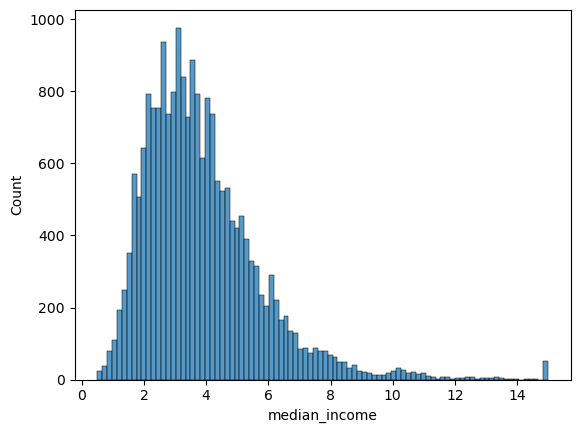

In [14]:
for i in columns:
    sns.histplot(df[i])
    plt.show()

In [15]:
# Import Necessary Linear Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
# Goal is to Determine House Value From Data
x = df['median_house_value']
y = df['total_rooms']

Text(0, 0.5, 'Total Rooms')

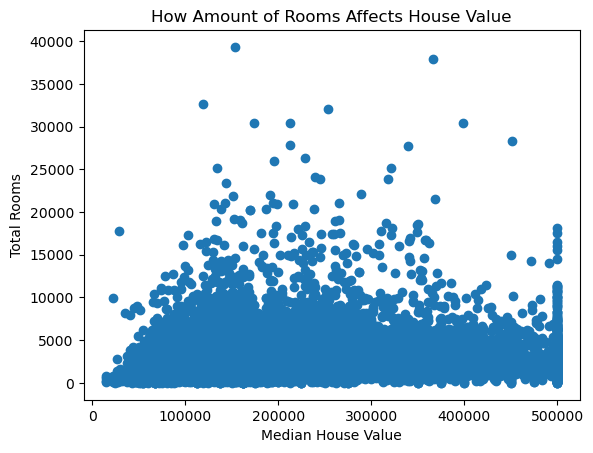

In [17]:
# Plot How The Total Room affect the House Value
plt.scatter(x, y)
plt.title("How Amount of Rooms Affects House Value")
plt.xlabel('Median House Value')
plt.ylabel('Total Rooms')

In [18]:
# Split Train and Test Data by 75-25
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.2)

print(x_train)

1394     166900
5187      91300
2536      70500
3387     293300
16271     65900
          ...  
11517    461600
4914     103800
8897     353600
10014    185900
4597     162500
Name: median_house_value, Length: 16512, dtype: int64


In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512,)
(16512,)
(4128,)
(4128,)


In [20]:
# Convert the Series to a NumPy array 
x_train_array = x_train.to_numpy()

# Reshape Array
x_train_reshaped = x_train_array.reshape(-1, 1)

print(x_train_reshaped.shape)

(16512, 1)


In [21]:
# Repeat Process for y_train
y_train_array = y_train.to_numpy()

# Reshape Array
y_train_reshaped = y_train_array.reshape(-1, 1)

print(y_train_reshaped.shape)

(16512, 1)


In [22]:
# Repeat Process for x_test
x_test_array = x_test.to_numpy()

# Reshape Array
x_test_reshaped = x_test_array.reshape(-1, 1)

print(x_test_reshaped.shape)

(4128, 1)


In [23]:
# Repeat Process for y_test
y_test_array = y_test.to_numpy()

# Reshape Array
y_test_reshaped = y_test_array.reshape(-1, 1)

print(y_test_reshaped.shape)

(4128, 1)


In [24]:
# Intialize and Fit Linear Regression Model
linearModel = LinearRegression()
linearModel.fit(x_train_reshaped, y_train_reshaped)

LinearRegression()

In [25]:
y_predict = linearModel.predict(x_test_reshaped)

print(y_predict)

[[2749.57115283]
 [2390.74695906]
 [2529.01183714]
 ...
 [2960.16312979]
 [3380.07177551]
 [2292.09586306]]


In [26]:
# Make a Data Frame for Predicted Values (for further analysis or comparison with the actual target values)

# Round Floating Values
rounded_predict_array = np.round(y_predict)

y_predict_df = pd.DataFrame(rounded_predict_array)
y_predict_df

,0
0,2750.0
1,2391.0
2,2529.0
3,2483.0
4,2595.0
...,...
4123,2624.0
4124,2372.0
4125,2960.0
4126,3380.0


In [27]:
print(y_test_reshaped)

[[3245]
 [1902]
 [1729]
 ...
 [2071]
 [4709]
 [2283]]


The index marker is not the same for the predicted vs the test but the order is the same. Therefore, must compare numbers from first to last throughout the array.

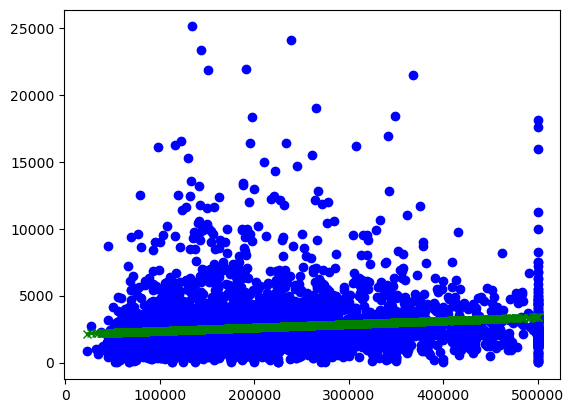

In [28]:
plt.scatter(x_test_reshaped, y_test_reshaped, color='blue')
plt.plot(x_test_reshaped, y_predict, marker='x', color='green')

In [29]:
# Calculate the number of correct predictions

# Convert predicted values to integers if needed (e.g., if they are probabilities)
y_predict_int = y_predict.astype(int)

# Calculate the number of correct predictions within the range of ±1000 units
correct_predictions = sum((y_predict_int >= y_test_reshaped - 1000) & (y_predict_int <= y_test_reshaped + 1000))

# Calculate the total number of predictions
total_predictions = len(y_test_reshaped)

# Calculate the accuracy percentage
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Accuracy Percentage: {accuracy_percentage.item():.2f}%")

Accuracy Percentage: 52.01%


In [30]:
# Create a Function 
def linearRegression (x, y):
    # Split Train and Test Data by 75-25
    x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.2)
    
    x_train_arr = x_train.to_numpy().reshape(-1,1)
    
    y_train_arr = y_train.to_numpy().reshape(-1,1)
    
    x_test_arr = x_test.to_numpy().reshape(-1,1)
    
    y_test_arr = y_test.to_numpy().reshape(-1,1)
    
    linearModel = LinearRegression()
    
    linearModel.fit(x_train_arr, y_train_arr)
    
    y_predict = linearModel.predict(x_test_arr)
    
    plt.scatter(x_test_arr, y_test_arr, color='blue')
    plt.plot(x_test_arr, y_predict, marker='x', color='green')
                                             

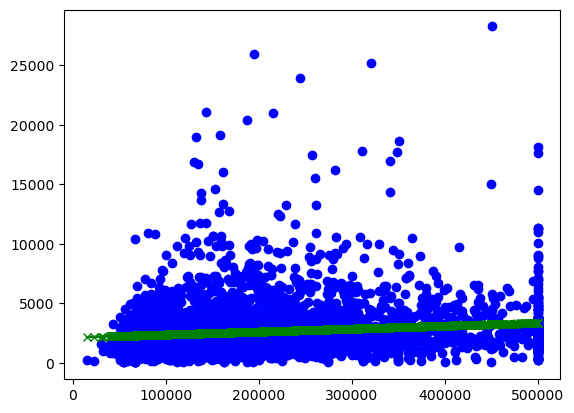

In [31]:
linearRegression(x,y)

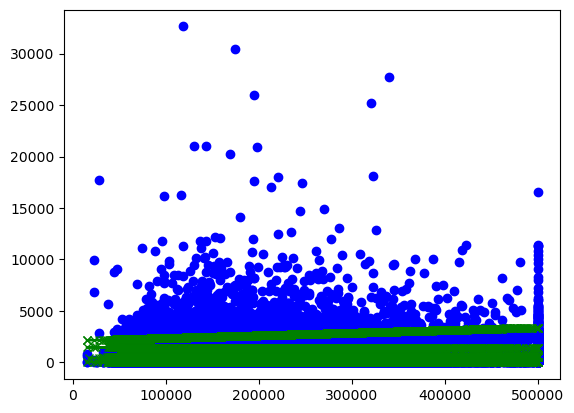

In [32]:
# Go Through All Factors Involved (With numerical X Values)
for i in columns:
    x = df['median_house_value']
    y = df[i]
    
    linearRegression(x,y)
